<a href="https://colab.research.google.com/github/ReneeZhang2017/The-Dream-of-Red-Mansions/blob/master/The_Dream_of_Red_Chamber_Renee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://lorasees.files.wordpress.com/2014/04/3384173644992224244.jpg)

# 1. Background

### **1.1 Introduction**

***Dream of the Red Chamber(红楼梦)*** , also called *The Story of the Stone*, composed by Cao Xueqin, is one of China's **Four Great Classical Novels**. It was written some time in the middle of the 18th century during the Qing dynasty. Long considered a masterpiece of Chinese literature, the novel is generally acknowledged to be the** pinnacle of Chinese fiction**."Redology" is the field of study devoted exclusively to this work. 


### **1.2 The controversy over the last 40 chapters**
The existing edition of the novel was published by Gao E in 1791 and it contains 120 chapters in total. Many modern scholars believe that the last 40 chapters were written by Gao, instead of the original author. Because the last 40 chapters lost the spirit and the foreshadowing of the main characters' fates in Chapter 5, differs from the ending of 1791 Gao's version. However, during the mid-20th century, the discovery of a 120 chapter manuscript that dates well before 1791 further, seems to confirm Cheng and Gao's claim that they merely edited a complete manuscript, consisting of 120 chapters, rather than actually writing a portion of the novel.

# 2.  Import data

In [0]:
import os
import numpy as np
import pandas as pd
import re
import sys  
import matplotlib.pyplot as plt
import jieba
#"Jieba" (Chinese for "to stutter") Chinese text segmentation

In [0]:
text = pd.read_csv("https://raw.githubusercontent.com/ReneeZhang2017/The-Dream-of-Red-Mansions/master/hongloumeng.csv")

In [0]:
text.head(5)

,id,text
0,1,\n甄士隐梦幻识通灵贾雨村风尘怀闺秀\n列位看官：你道此书从何而来？说起根由，虽近荒唐，细按...
1,2,\n贾夫人仙逝扬州城冷子兴演说荣国府\n诗云：\n一局输赢料不真，香销茶尽尚逡巡。欲知目下兴...
2,3,\n金陵城起复贾雨村荣国府收养林黛玉\n却说雨村忙回头看时，不是别人，乃是当日同僚一案参革的...
3,4,\n薄命女偏逢薄命郎葫芦僧乱判葫芦案\n题曰：\n捐身报国恩，未报身犹在。眼底物多情，君恩或...
4,5,\n游幻境指迷十二钗饮仙醪曲演红楼梦\n\n如今且说林黛玉自在荣府以来，贾母万般怜爱，寝食起...


# 3. EDA

### 3.1 Image for the whole book

(-0.5, 699.5, 499.5, -0.5)

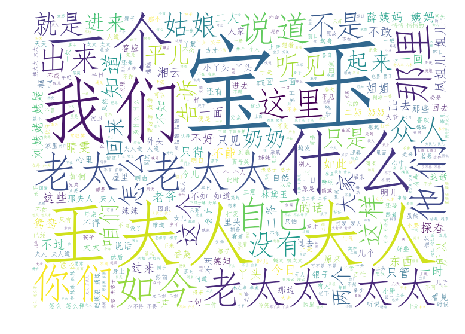

In [0]:
from wordcloud import WordCloud
text = open("红楼梦.txt","rb").read()
wordlist = jieba.cut(text,cut_all=True)
wl = " ".join(wordlist)
 
wc = WordCloud(background_color = "white", 
               max_words = 500, 
               font_path = "FangSong.ttf",
#set Chinese font for word cloud, because the default font of word could is “DroidSansMono.ttf", which doesn't support Chinese) 
               width=700, height=500,
 )
myword = wc.generate(wl)
plt.imshow(myword)
plt.axis("off")

### 3.2 The most frequent words used in the first 80 chapeters and last 40 chapters

In [0]:
txt = open("hlm.txt", "r", encoding="gb18030",errors='ignore').read()
def most(tt): 
  jieba.enable_parallel(2)
  s1 = [x for x in jieba.cut_for_search(tt) if len(x) >= 2]
  jieba.disable_parallel() 
  from collections import Counter
  c = Counter(s1).most_common(100) 
  return c 
kk=txt.index('第八十一回')
hui_1_80=txt[:kk]
hui_81_120=txt[kk:]
def se(pp):
    return pd.Series(dict(most(pp))).sort_values(ascending=False)
a=se(hui_1_80)
b=se(hui_81_120)

merge=pd.DataFrame()
merge['1-80']=list(a.index)
merge['81-120']=list(b.index)

In [0]:
merge.head(10)

,1-80,81-120
0,宝玉,宝玉
1,什么,太太
2,一个,什么
3,太太,夫人
4,我们,那里
5,夫人,怎么
6,贾母,贾母
7,你们,王夫人
8,凤姐,老太
9,那里,老太太


### 3.3 Who is the main characters?

In [0]:
import codecs
with codecs.open('names.txt', encoding="utf8") as f:
    data = [line.strip() for line in f]
novels = data[::2]
names = data[1::2]
novel_names = {k: v.split() for k, v in zip(novels, names)}

for name in novel_names['红楼梦'][:5]:
    print(name)


林黛玉
薛宝钗
贾元春
贾迎春
贾探春


In [0]:
from matplotlib.font_manager import FontProperties
font_yahei_consolas = FontProperties(fname="FangSong.ttf")

def find_main_charecters(novel, num=10):
    with codecs.open('{}.txt'.format(novel), encoding="utf8") as f:
        data = f.read()
    chars = novel_names[novel]
    count = map(lambda x: data.count(x), chars)
    count=list(count)
    haha = pd.DataFrame(
    {'Characters': chars,
     'Count': count,
    })
    
    font_path = "FangSong.ttf"
    haha=haha.sort_values(by=['Count'],ascending=False)  
    haha=haha.reset_index(drop=True)
    haha=haha.head(10)
    print(haha)
    plt.bar(haha["Characters"], haha["Count"],align='center', alpha=0.5,color='red')
    plt.title(novel, 
              fontsize=14, 
              fontproperties=font_yahei_consolas)
    plt.xticks(fontproperties=font_yahei_consolas)


  Characters  Count
0         宝玉   3861
1         黛玉   1317
2         袭人   1129
3        王夫人   1065
4         宝钗   1048
5         贾政    912
6         贾琏    764
7         平儿    681
8         鸳鸯    426
9         鸳鸯    426


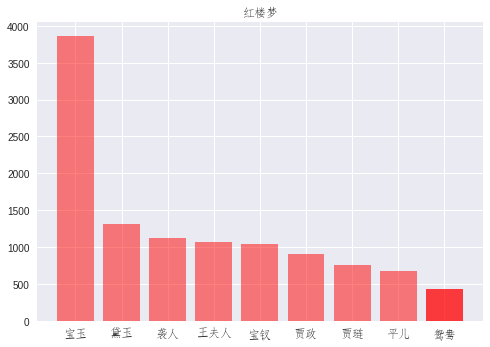

In [0]:
find_main_charecters("红楼梦")

### 3.4 Finding relationship

In [0]:
with codecs.open("names.txt", encoding="utf8") as f:
    novel_names = [line.strip() for line in f]
        
for name in novel_names:
        jieba.add_word(name)

In [0]:
novels = ["红楼梦"]

sentences = []

for novel in novels:
    with codecs.open('{}.txt'.format(novel), encoding="utf8") as f:
        sentences += [list(jieba.cut(line.strip())) for line in f]


In [0]:
model = gensim.models.Word2Vec(sentences, 
                               size=100, 
                               window=5, 
                               min_count=5, 
                               workers=4)

In [0]:
for k, s in model.most_similar(positive=["宝钗"]):
    print(k, s)

黛玉 0.949488639831543
紫鹃 0.9357027411460876
贾珍 0.9300026893615723
连忙 0.9274921417236328
尤氏 0.9246121048927307
只得 0.9236159920692444
探春 0.9156208038330078
贾政 0.9153764843940735
薛姨妈 0.9120097160339355
起身 0.9096497297286987


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
def find_relationship(a, b, c):
    d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
    print("Given“{}”and“{}”，“{}”and“{}”have similar relationship".format(a, b, c, d))

find_relationship("宝玉", "玉", "黛玉")


Given“宝玉”and“玉”，“黛玉”and“满纸”have similar relationship


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# 4. Model

## 4.1 Preparation

### 4.1.1 Extract Key words

In [0]:
import jieba.analyse
#Use jieba.analyse.extract_tags to get the top 1000 most frequent key words
text = pd.read_csv("hongloumeng.csv")
vorc = [jieba.analyse.extract_tags(i, topK=1000,) for i in text["text"]]
vorc = [" ".join(i) for i in vorc]

In [0]:
print(vorc[119])

宝玉 雨村 薛姨妈 袭人 贾政 宝钗 王夫人 士隐 一番 士隐道 太太 老爷 空空 的话 众人 老先生 道人 贾雨村 说道 果然 姐姐 丫头 不知 奶奶 这样 草庵 小厮 下凡 心里 那里 抄录 出去 自己 点头 所以 便是 老仙翁 打发 家书 一个 大夫 俗缘 花自芳 津觉 仙长 回来 媳妇 如今 和尚 不好 甄士隐 贾琏 蒋玉菡 先生 蒋家 服侍 哥哥 屋里人 曹雪芹 不必 怎么 不是 告诉 如此 一面 姑爷 此时 喜欢 只见 岂知 香菱 薛蟠 方知 没有 下愚 兰桂齐芳 仍旧 相逢 心肠 难处 急流 石兄 那日 一遍 不敢 宝钗房 请教 宝哥儿 将来 贾政进 旨意 必是 举人 姊妹 拋了 回明 一僧 便命 正配 人来 回说 此玉 高魁子 俱属 宁两府 悼红轩 有个 几日 痛哭 愿意 那僧道 好些 何以 青埂峰 舛错 人家 太虚幻境 可不是 且说 伤心 这里 必定 认得 情缘 石头记 传述 言语 不该 赦罪 尘缘 还要 贾政又 一会 打听 心想 巧姐儿 静养 汗巾 年纪 接引 一日 看见 那宝玉 只要 原来 秋纹 亲见 后来 今日 命苦 知道 仙子 起来 主意 归结 始末 大家 商量 飘然 早知 昌盛 那有 情意 刘姥姥 只得 赎罪 一段 完结 你们 贾政道 大士 打算 回家 不见 后事 大凡 各自 从此 心痛 就是 贾珍 字迹 倒把 不想 念书 尚未 别的 回去 想念 细细的 亲事 怎样 圣上 深为 真人 她家 家里 随后 渡口 问道 荒唐 想到 接着 一定 悲伤 料理 暂且 上岸 一种 不可 谢恩 咱们 繁华 细细 古今 此言 不忍 道士 而行 富贵 老大 那年 现今 下落 明白 三个 古怪 孩子 外头 结局 正说 自然 况且 虽说 恰好 追赶 睡着 模糊 叹息 此人 惊讶 那人 一点 老太太 办事 赶来 越发 好象 原是 弟兄 妹妹 家人 勉强 一行 微微 跟前 提起 另样 妄口巴舌 觉解 孽子孤臣 下愚不移 情天孽海 收缘结果 鲁鱼亥豕 背谬 陶情适性 竿头 从前 好处 我们 一回 那天 当初 这事 地方 贾母灵 起旱 雪影 不顾前后 明路儿 贾政喝 散慢 文妙真人 周家为 居养静 夙缘 苏小 道理 这是 连忙 一人 贾政才 贾政问 那宝钗 伶牙利齿 贾政回 叙别 地灵 尘心 福善祸淫 缥渺 山灵 寻根问底 游戏笔墨 不过 吩咐 但是 贾蓉送 历劫 足衣

### 4.2.2 Vectorization
1. Generate a vertorizer 
2. transfrom "vorc", and get 120 word vector
3. Transform to array format

In [0]:
from  sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
data_features = vectorizer.fit_transform(vorc)

In [0]:
data_features =data_features.toarray()
data_features.shape

(120, 5000)

## 4.2 Select Models

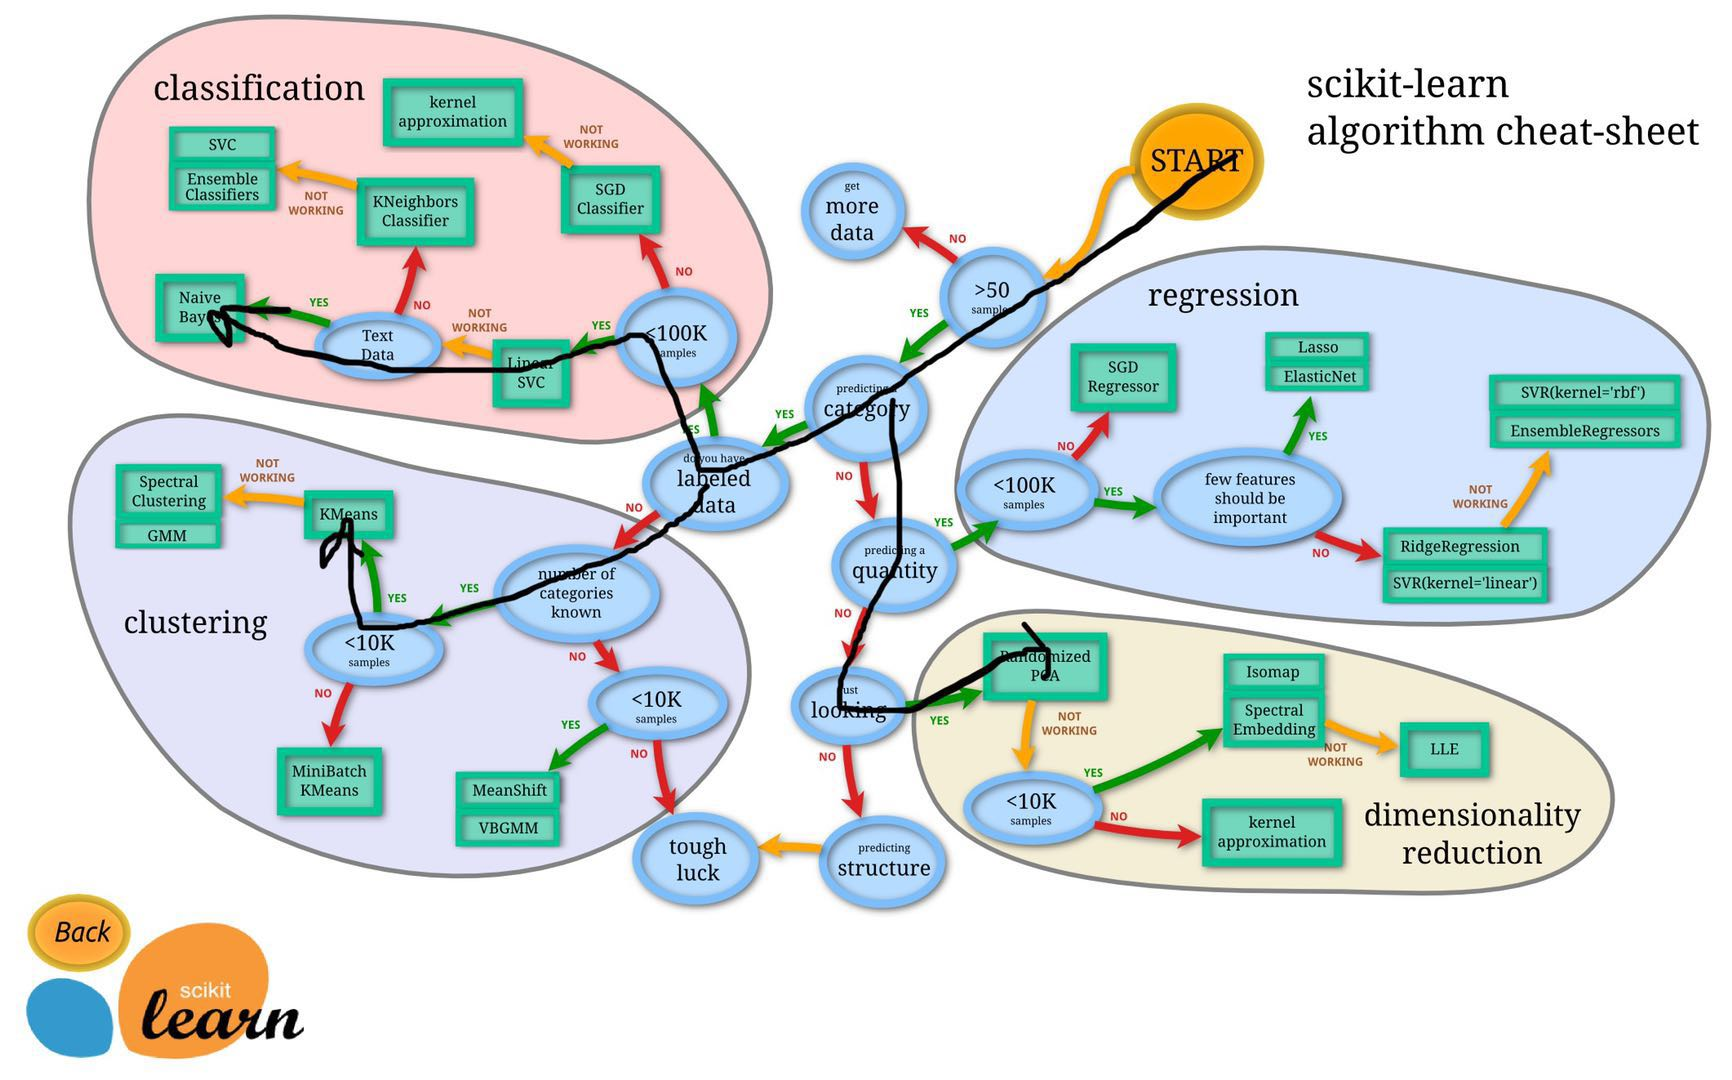

In [0]:
from IPython.display import Image
Image('ml_map.jpg', width=600, height=500)

## 4.3 Clustering KMeans

#### PCA

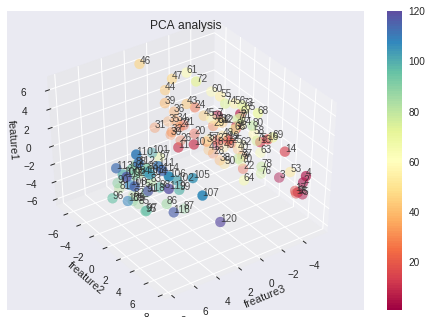

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(data_features)

from mpl_toolkits import mplot3d
plt.figure()
ax = plt.axes(projection='3d')
fig = ax.scatter3D(proj[:,0],proj[:,1],proj[:,2],c=range(1,121),
	cmap = plt.cm.get_cmap('Spectral',120),s=100)
for i in range(1,len(proj)+1):
    ax.text(proj[i-1,0],proj[i-1,1],proj[i-1,2],i,size=10,alpha=0.8)
ax.set_zlabel('feature1') 
ax.set_ylabel('freature2')
ax.set_xlabel('freature3')
plt.colorbar(fig)
ax.set_title('PCA analysis')
ax.view_init(40,55)

#### ISOMAP

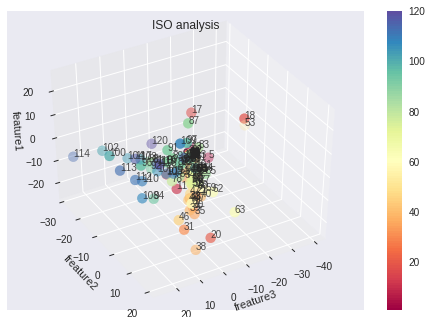

In [0]:
from sklearn.manifold import Isomap
model = Isomap(n_components=3)
proj = model.fit_transform(data_features)
from mpl_toolkits import mplot3d
plt.figure()
ax = plt.axes(projection='3d')
fig = ax.scatter3D(proj[:,0],proj[:,1],proj[:,2],c=range(1,121),
	cmap = plt.cm.get_cmap('Spectral',120),s=100)
for i in range(1,len(proj)+1):
    ax.text(proj[i-1,0],proj[i-1,1],proj[i-1,2],i,size=10,alpha=0.8)
ax.set_zlabel('feature1') 
ax.set_ylabel('freature2')
ax.set_xlabel('freature3')
plt.colorbar(fig)
ax.set_title('ISO analysis')
ax.view_init(40,60)

#### KMeans

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


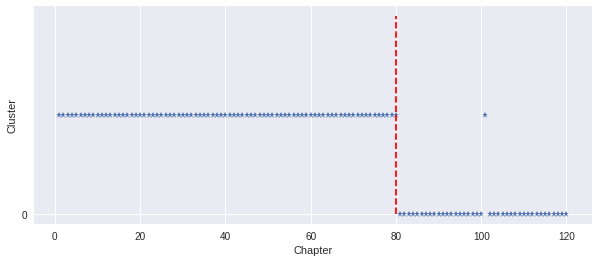

In [0]:
cluster=2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_features[0:120])
print(kmeans.labels_)
X = range(1, len(data_features) + 1)
Y = kmeans.labels_
plt.figure(figsize=(10, 4))
plt.plot(X, Y, "*")
plt.xlabel("Chapter")
plt.ylabel("Cluster")
y_ticks = np.arange(0, 1, 1)
plt.yticks(y_ticks)
plt.plot([80,80], [0, cluster], "r--")

#### Different clusters

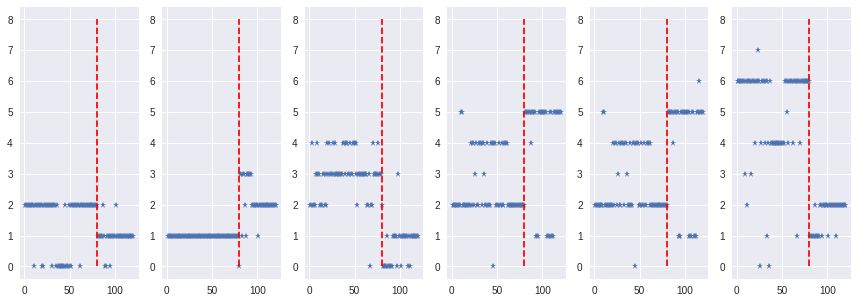

In [0]:
cluster = 8
f = plt.figure(figsize=(20, 5))
for i in range(3, cluster + 1):
    subplot = "1" + str(cluster) + str(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(train_data_features[0:120])
    X = range(1, len(train_data_features) + 1)
    Y = kmeans.labels_
    ax = f.add_subplot(subplot)
    plt.plot(X, Y, "*")
    plt.plot([80,80], [0, cluster], "r--")

## Classification---Naive Bayes---GaussianNB
 
1. Assume the whole book was written by 2 people. 
2. Generate Lables: Set first 80 chapter as "1" Set last 40 chapter as "0"
3. Use stratified random sampling method to split the train and test

In [0]:
labels = np.array([[1] * 80 + [0] * 40]).reshape(-1 ,1) 
labels.shape

(120, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_features, labels, 
                                                    test_size = 0.2, stratify=labels)

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Y_test.reshape(1,-1)

array([[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1]])

In [0]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7916666666666666

#### Stratified k-fold cross validation

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.2)
scores = []
for train_index, test_index in sss.split(data_features, labels):
    X_train, X_test = data_features[train_index], data_features[test_index]
    Y_train, Y_test = labels[train_index], labels[test_index]
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))
print(scores)
print(np.array(scores).mean())

[0.75, 0.7916666666666666, 0.8333333333333334, 0.8333333333333334, 0.75, 0.875, 0.75, 0.7083333333333334, 0.875, 0.7916666666666666]
0.7958333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# 5. Conclusion

## Deficiency and Improment 
**1. Plot related features**
*   Use function word
*   Control test

**2. Data Limitation**
*   Instead of split the novel by chapters, we could try to split by paragraphs

**3. Try different model--RNN **

*   RNN works with text very well






## Project Summary
### Model tells us that the Dream of Red Chamber was written by different authors